In [1]:
# Set Jupyter to render directly to the screen
%matplotlib inline

# Import pandas and numpy for analysis
import pandas as pd
import numpy as np
import matplotlib as plt
import math as math

# Importing the Black Scholes functions

In [2]:
from black_scholes import call_value, put_value, call_delta, put_delta, call_vega, put_vega

In [3]:
help(call_value)

Help on function call_value in module black_scholes:

call_value(S, K, T, r, sigma)
    The fair value of a call option paying max(S-K, 0) at expiry, under the Black-scholes model,
    for an option with strike <K>, expiring in <T> years, under a fixed interest rate <r>,
    a stock volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The current value of the underlying stock.
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    call_value : float
        The fair present value of the option.



In [4]:
help(put_value)

Help on function put_value in module black_scholes:

put_value(S, K, T, r, sigma)
    The fair value of a put option paying max(K-S, 0) at expiry, under the Black-scholes model,
    for an option with strike <K>, expiring in <T> years, under a fixed interest rate <r>,
    a stock volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The value of the underlying stock.
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    put_value : float
        The fair present value of the option.



In [5]:
help(call_delta)

Help on function call_delta in module black_scholes:

call_delta(S, K, T, r, sigma)
    The delta, i.e. the first derivative of the option value with respect to the underlying, 
    of a call option paying max(S-K, 0) at expiry, under the Black-scholes model, for an option 
    with strike <K>, expiring in <T> years, under a fixed interest rate <r>, a stock 
    volatility <sigma>, and when the current price of the underlying stock is <S>.
        
    Parameters
    ----------
    S : float
        The value of the underlying stock.
    
    K : float
        The strike price of the option.
        
    T : float
        Time to expiry in years.
    
    r : float
        The fixed interest rate valid between now and expiry.
    
    sigma : float
        The volatility of the underlying stock process.
    
    Returns
    -------
    call_delta : float
        The fair present value of the option.



# Testing the Black-Scholes function

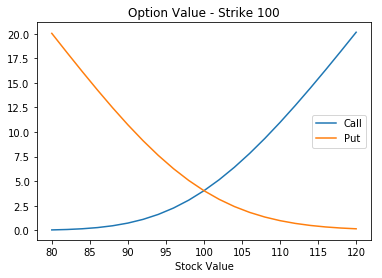

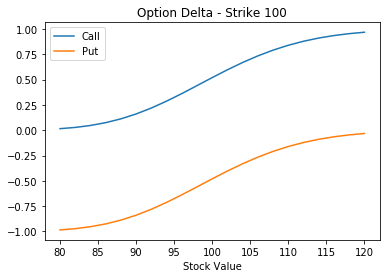

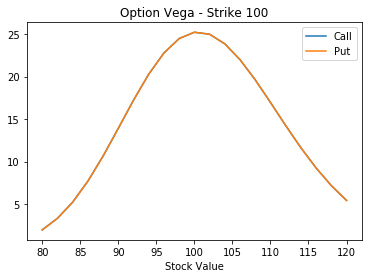

In [6]:
# This is an example showing the functionality of the black_scholes module by making a plot
# of the option values and greeks for different prices of the underlying stock. You will need 
# to use the same functions, call_value, put_value, call_delta, etc. with different inputs 
# for your own trading strategy.

K = 100
T = 0.4
r = 0.0
sigma = 0.16

stock_values = range(80, 122, 2)

call_values = list()
put_values = list()
call_deltas = list()
put_deltas = list()
call_vegas = list()
put_vegas = list()

for stock_value in stock_values:
    call_values.append(call_value(stock_value, K, T, r, sigma))
    put_values.append(put_value(stock_value, K, T, r, sigma))
    call_deltas.append(call_delta(stock_value, K, T, r, sigma))
    put_deltas.append(put_delta(stock_value, K, T, r, sigma))
    call_vegas.append(call_vega(stock_value, K, T, r, sigma))
    put_vegas.append(put_vega(stock_value, K, T, r, sigma))

    
option_values = pd.DataFrame(data={'Call': call_values, 'Put': put_values}, index=stock_values)
option_values.index.name = 'Stock Value'

option_deltas = pd.DataFrame(data={'Call': call_deltas, 'Put': put_deltas}, index=stock_values)
option_deltas.index.name = 'Stock Value'

option_vegas = pd.DataFrame(data={'Call': call_vegas, 'Put': put_vegas}, index=stock_values)
option_vegas.index.name = 'Stock Value'

option_values.plot(title='Option Value - Strike {}'.format(K))
option_deltas.plot(title='Option Delta - Strike {}'.format(K))
option_vegas.plot(title='Option Vega - Strike {}'.format(K))

# Reading in the CSV file

In [7]:
def read_data(filename):
    '''
    This function reads the .csv stored at the 'filename' location and returns three DataFrame's.
    
    The first DataFrame contains the Stock bid and ask price and volumes. It is indexed by timestamp.
    There is one level of column names, which describes whether it is a BidPrice, BidVolume, AskPrice
    or AskVolume.
    
    The second DataFrame contains the Time-to-Expiry of the options in the dataset. It is indexed by
    timestamp, and has one level of column names. There is only one column: the time to expiry.
  
    The third DataFrame contains the Option bid and ask price and volumes for different strikes. It
    is indexed by timestamp and has three levels of columns. The first level gives the strike, the second
    level gives the option type (C for Call and P for put), the third level gives whether it is a
    BidPrice, BidVolume, AskPrice or AskVolume.
    '''
    df = pd.read_csv(filename, index_col=0)
       
    time_to_expiry = df.filter(like='TimeToExpiry')
    
    stock = df.filter(like='Stock')
    stock.columns = [stock.columns.str[-5:], stock.columns.str[:-6]]
    
    options = pd.concat((df.filter(like='-P'), df.filter(like='-C')), axis=1)  
    options.columns = [options.columns.str[-3:], options.columns.str[:-4]]

    market_data = pd.concat((stock, options), axis=1)
    
    return time_to_expiry, market_data

In [8]:
# Read the market data

filename = 'Options Arbitrage.csv'
time_to_expiry, market_data = read_data(filename)

In [9]:
# Get a list of all instrument names including the stock, and of the options only
instrument_names = list(market_data.columns.get_level_values(0).unique())
print(instrument_names)

option_names = instrument_names[1:]
print(option_names)

['Stock', 'P60', 'P70', 'P80', 'C60', 'C70', 'C80']
['P60', 'P70', 'P80', 'C60', 'C70', 'C80']


# Some Examples

In [10]:
# What is in the market_data dataframe? 
market_data.head()

Stock                                   P60            \
                    BidPrice BidVolume AskPrice AskVolume BidPrice BidVolume   
2018-01-01 00:05:00    70.70     120.0    70.90     120.0     1.30      20.0   
2018-01-01 00:10:00    70.75     116.0    71.00     119.0     1.28      20.0   
2018-01-01 00:15:00    70.85     120.0    71.05     107.0     1.28      23.0   
2018-01-01 00:20:00    70.80     121.0    71.05     120.0     1.31      22.0   
2018-01-01 00:25:00    70.75     137.0    71.00     139.0     1.30      24.0   

                                            P70              ...         C60  \
                    AskPrice AskVolume BidPrice BidVolume    ...    AskPrice   
2018-01-01 00:05:00     1.35      20.0     4.92      20.0    ...       12.17   
2018-01-01 00:10:00     1.33      18.0     4.93      19.0    ...       12.19   
2018-01-01 00:15:00     1.33      20.0     4.96      18.0    ...       12.22   
2018-01-01 00:20:00     1.36      21.0     5.00      17.0    ...       12.21   
2018-01-01 00:25:00     1.35      21.0     5.00      17.0    ...       12.21   

                                   C70                                   C80  \
                    AskVolume BidPrice BidVolume AskPrice AskVolume BidPrice   
2018-01-01 00:05:00      20.0     5.71      20.0     5.81      20.0     2.22   
2018-01-01 00:10:00      19.0     5.74      19.0     5.85      21.0     2.23   
2018-01-01 00:15:00      19.0     5.77      20.0     5.88      24.0     2.25   
2018-01-01 00:20:00      18.0     5.75      22.0     5.87      21.0     2.30   
2018-01-01 00:25:00      18.0     5.72      22.0     5.84      23.0     2.31   

                                                  
                    BidVolume AskPrice AskVolume  
2018-01-01 00:05:00      20.0     2.30      20.0  
2018-01-01 00:10:00      18.0     2.32      20.0  
2018-01-01 00:15:00      19.0     2.34      20.0  
2018-01-01 00:20:00      18.0     2.39      19.0  
2018-01-01 00:25:00      19.0     2.40      19.0  

[5 rows x 28 columns]

In [11]:
# What is in the time to expiry dataframe?
time_to_expiry.tail()

,TimeToExpiry
2018-02-28 23:35:00,0.750038
2018-02-28 23:40:00,0.750029
2018-02-28 23:45:00,0.750019
2018-02-28 23:50:00,0.750010
2018-02-28 23:55:00,0.750000


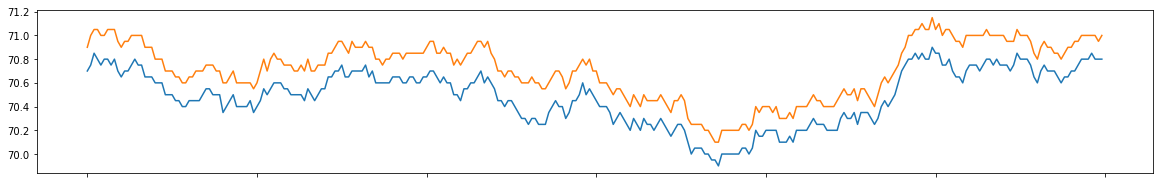

In [12]:
# Plot bids and asks for the stock
market_data['Stock', 'BidPrice'].head(300).plot(figsize=(20, 3))
market_data['Stock', 'AskPrice'].head(300).plot(figsize=(20, 3))

P70 C70


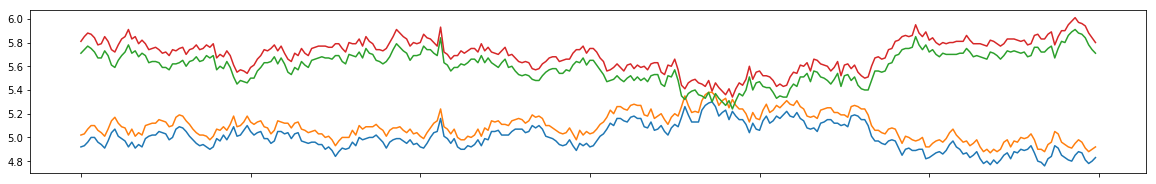

In [13]:
# Plot bids and asks for two of the options
print(option_names[1], option_names[4])

market_data[option_names[1], 'BidPrice'].head(300).plot(figsize=(20, 3))
market_data[option_names[1], 'AskPrice'].head(300).plot(figsize=(20, 3))
market_data[option_names[4], 'BidPrice'].head(300).plot(figsize=(20, 3))
market_data[option_names[4], 'AskPrice'].head(300).plot(figsize=(20, 3))

# Exercise

In [14]:
# Now it's your turn. Start by calculating your own theoretical values and deltas for the options. Visualize 
# these alongside the market data, is it clear when you would want to do a trade? Enter positions when that 
# is the case, and manage your delta-risk by hedging away your delta position in the underlying stock.

In [15]:
# Merge market_data with time to expiry and calculate mid prices

market_data["TimeToExpiry"] = time_to_expiry["TimeToExpiry"]

market_data["Stock", "MidPrice"] = (market_data["Stock", "AskPrice"] + market_data["Stock", "BidPrice"])/2

market_data.head()

Stock                                   P60            \
                    BidPrice BidVolume AskPrice AskVolume BidPrice BidVolume   
2018-01-01 00:05:00    70.70     120.0    70.90     120.0     1.30      20.0   
2018-01-01 00:10:00    70.75     116.0    71.00     119.0     1.28      20.0   
2018-01-01 00:15:00    70.85     120.0    71.05     107.0     1.28      23.0   
2018-01-01 00:20:00    70.80     121.0    71.05     120.0     1.31      22.0   
2018-01-01 00:25:00    70.75     137.0    71.00     139.0     1.30      24.0   

                                            P70             ...         C70  \
                    AskPrice AskVolume BidPrice BidVolume   ...    BidPrice   
2018-01-01 00:05:00     1.35      20.0     4.92      20.0   ...        5.71   
2018-01-01 00:10:00     1.33      18.0     4.93      19.0   ...        5.74   
2018-01-01 00:15:00     1.33      20.0     4.96      18.0   ...        5.77   
2018-01-01 00:20:00     1.36      21.0     5.00      17.0   ...        5.75   
2018-01-01 00:25:00     1.35      21.0     5.00      17.0   ...        5.72   

                                                      C80                     \
                    BidVolume AskPrice AskVolume BidPrice BidVolume AskPrice   
2018-01-01 00:05:00      20.0     5.81      20.0     2.22      20.0     2.30   
2018-01-01 00:10:00      19.0     5.85      21.0     2.23      18.0     2.32   
2018-01-01 00:15:00      20.0     5.88      24.0     2.25      19.0     2.34   
2018-01-01 00:20:00      22.0     5.87      21.0     2.30      18.0     2.39   
2018-01-01 00:25:00      22.0     5.84      23.0     2.31      19.0     2.40   

                              TimeToExpiry    Stock  
                    AskVolume              MidPrice  
2018-01-01 00:05:00      20.0     0.911625   70.800  
2018-01-01 00:10:00      20.0     0.911615   70.875  
2018-01-01 00:15:00      20.0     0.911606   70.950  
2018-01-01 00:20:00      19.0     0.911596   70.925  
2018-01-01 00:25:00      19.0     0.911587   70.875  

[5 rows x 30 columns]

In [16]:
# Calculate theoretical prices and greeks for options using a for loop to make it easy
# if we buy a put, we also buy the underlying stock so we need the ask price of the stock to calcualate the value and delta.
# the same goes for when we sell a call. The opposite goes for when we buy a call or sell a put. Using the bid and ask prices
# as stock price in these calculations is easier than using the midprice, because that would complicate the algorithm later on

for option in option_names:
    if option[0] == "P":
        market_data[option, "ValueAsk"] = put_value(market_data["Stock", "AskPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
        market_data[option, "ValueBid"] = put_value(market_data["Stock", "BidPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
        market_data[option, "DeltaAsk"] = put_delta(market_data["Stock", "AskPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
        market_data[option, "DeltaBid"] = put_delta(market_data["Stock", "BidPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
        market_data[option, "DeltaMid"] = put_delta(market_data["Stock", "MidPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
    if option[0] == "C":
        market_data[option, "ValueAsk"] = call_value(market_data["Stock", "BidPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
        market_data[option, "ValueBid"] = call_value(market_data["Stock", "AskPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
        market_data[option, "DeltaAsk"] = call_delta(market_data["Stock", "BidPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
        market_data[option, "DeltaBid"] = call_delta(market_data["Stock", "AskPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)
        market_data[option, "DeltaMid"] = call_delta(market_data["Stock", "MidPrice"],
                                           int(option[1:]),
                                           market_data["TimeToExpiry"],
                                           0,
                                           0.2)

market_data = market_data.sort_index(axis = 1, ascending = False)
market_data.head()

TimeToExpiry    Stock                               \
                                 MidPrice BidVolume BidPrice AskVolume   
2018-01-01 00:05:00     0.911625   70.800     120.0    70.70     120.0   
2018-01-01 00:10:00     0.911615   70.875     116.0    70.75     119.0   
2018-01-01 00:15:00     0.911606   70.950     120.0    70.85     107.0   
2018-01-01 00:20:00     0.911596   70.925     121.0    70.80     120.0   
2018-01-01 00:25:00     0.911587   70.875     137.0    70.75     139.0   

                                    P80                                 \
                    AskPrice   ValueBid   ValueAsk  DeltaMid  DeltaBid   
2018-01-01 00:05:00    70.90  11.536242  11.394867 -0.706876 -0.709418   
2018-01-01 00:10:00    71.00  11.500779  11.324538 -0.704967 -0.708149   
2018-01-01 00:15:00    71.05  11.430067  11.289456 -0.703055 -0.705606   
2018-01-01 00:20:00    71.05  11.465355  11.289432 -0.703695 -0.706880   
2018-01-01 00:25:00    71.00  11.500706  11.324464 -0.704971 -0.708153   

                      ...         C70        C60                       \
                      ...    AskPrice   ValueBid   ValueAsk  DeltaMid   
2018-01-01 00:05:00   ...        5.81  12.207603  12.041197  0.832035   
2018-01-01 00:10:00   ...        5.85  12.291066  12.082711  0.833424   
2018-01-01 00:15:00   ...        5.88  12.332857  12.165896  0.834805   
2018-01-01 00:20:00   ...        5.87  12.332839  12.124254  0.834347   
2018-01-01 00:25:00   ...        5.84  12.291013  12.082657  0.833427   

                                                                               
                     DeltaBid  DeltaAsk BidVolume BidPrice AskVolume AskPrice  
2018-01-01 00:05:00  0.833884  0.830169      20.0    12.06      20.0    12.17  
2018-01-01 00:10:00  0.835719  0.831105      20.0    12.08      19.0    12.19  
2018-01-01 00:15:00  0.836631  0.832963      20.0    12.11      19.0    12.22  
2018-01-01 00:20:00  0.836632  0.832038      19.0    12.11      18.0    12.21  
2018-01-01 00:25:00  0.835722  0.831108      19.0    12.11      18.0    12.21  

[5 rows x 60 columns]

In [17]:
# Examine data when the theoretical ask value is higher than the ask price (undervalued call option)
market_data.loc[market_data["C60", "ValueAsk"] > market_data["C60", "AskPrice"]].head()

TimeToExpiry    Stock                               \
                                 MidPrice BidVolume BidPrice AskVolume   
2018-01-04 07:45:00     0.902530   70.500     133.0    70.40     113.0   
2018-01-04 17:40:00     0.901398   70.150     122.0    70.05     132.0   
2018-01-04 17:45:00     0.901389   70.150     131.0    70.05     112.0   
2018-01-06 07:50:00     0.897041   69.925     121.0    69.85     133.0   
2018-01-06 17:15:00     0.895967   70.400      77.0    70.30      91.0   

                                    P80                                 \
                    AskPrice   ValueBid   ValueAsk  DeltaMid  DeltaBid   
2018-01-04 07:45:00    70.60  11.727486  11.584332 -0.715771 -0.718298   
2018-01-04 17:40:00    70.25  11.977656  11.832706 -0.724750 -0.727252   
2018-01-04 17:45:00    70.25  11.977632  11.832682 -0.724751 -0.727254   
2018-01-06 07:50:00    70.00  12.113044  12.003392 -0.731013 -0.732879   
2018-01-06 17:15:00    70.50  11.783098  11.639249 -0.719245 -0.721770   

                      ...         C70        C60                       \
                      ...    AskPrice   ValueBid   ValueAsk  DeltaMid   
2018-01-04 07:45:00   ...        5.56  11.941135  11.775664  0.827356   
2018-01-04 17:40:00   ...        5.42  11.649889  11.485750  0.820698   
2018-01-04 17:45:00   ...        5.44  11.649870  11.485731  0.820699   
2018-01-06 07:50:00   ...        5.31  11.436339  11.313835  0.816694   
2018-01-06 17:15:00   ...        5.44  11.845849  11.680622  0.826141   

                                                                               
                     DeltaBid  DeltaAsk BidVolume BidPrice AskVolume AskPrice  
2018-01-04 07:45:00  0.829255  0.825440      16.0    11.67      23.0    11.77  
2018-01-04 17:40:00  0.822655  0.818725      17.0    11.37      20.0    11.47  
2018-01-04 17:45:00  0.822656  0.818726      17.0    11.36      20.0    11.46  
2018-01-06 07:50:00  0.818192  0.815186      20.0    11.19      22.0    11.30  
2018-01-06 17:15:00  0.828059  0.824207      22.0    11.58      23.0    11.68  

[5 rows x 60 columns]

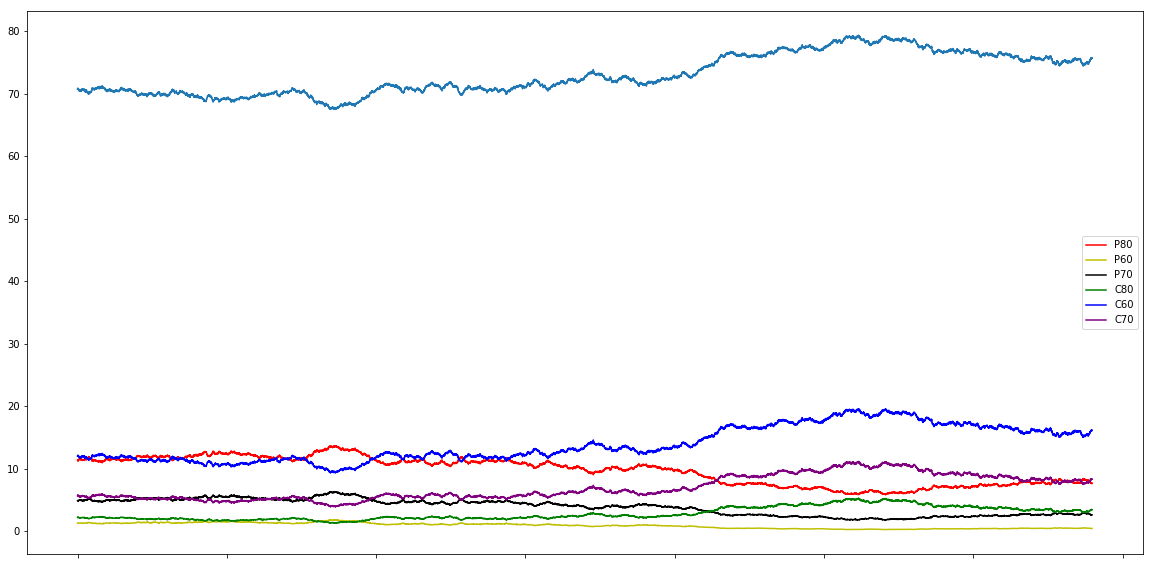

In [18]:
# Visualizing the problem:
# when the stock price goes up, the value of a call option
# goes up and the reverse happens for put options

market_data["Stock", "BidPrice"].plot(figsize = (20,10))
market_data["P80", "ValueAsk"].plot(color = 'r', label = "P80",legend = True)
market_data["P60", "ValueAsk"].plot(color = 'y', label = "P60",legend = True)
market_data["P70", "ValueAsk"].plot(color = 'black', label = "P70",legend = True)
market_data["C80", "ValueAsk"].plot(color = 'g', label = "C80",legend = True)
market_data["C60", "ValueAsk"].plot(color = 'b', label = 'C60',legend = True)
market_data["C70", "ValueAsk"].plot(color = 'purple', label = "C70", legend = True)


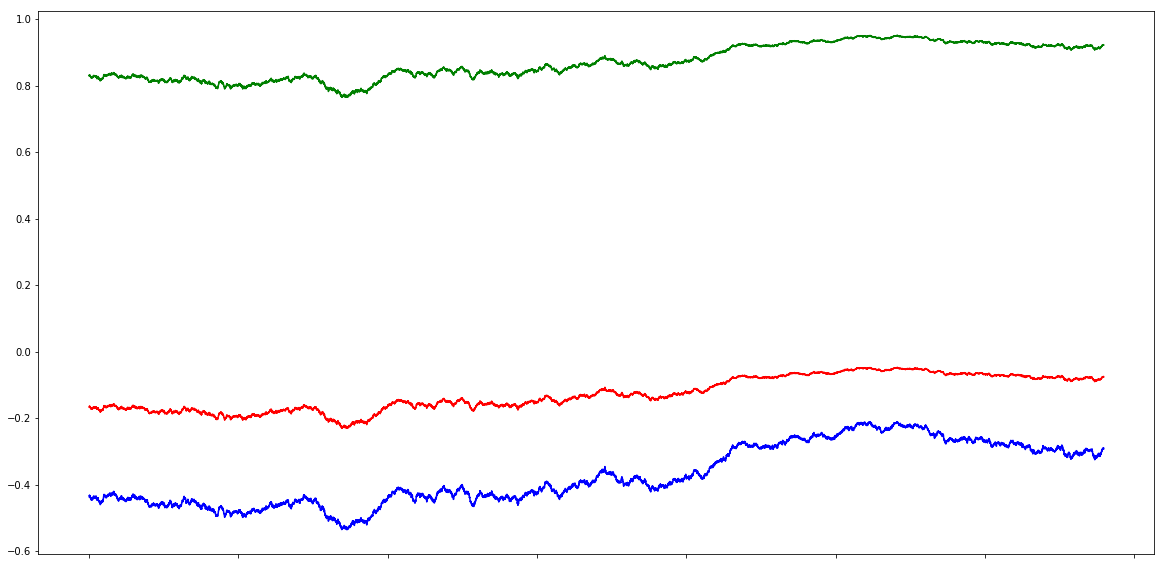

In [19]:
# Visualizing: how do the deltas of the options evolve
# call deltas move in the same way as the call values, but
# put deltas move in the opposite directino of the put values
# makes sense because delta is about change, but not the direction of the change

market_data["P60", "DeltaAsk"].plot(color = 'r', figsize = (20,10))
# market_data["P60", "PutValue"].plot(color = 'r')
market_data["P70", "DeltaAsk"].plot(color = 'b')
# market_data["P70", "PutValue"].plot(color = 'b')

market_data["C60", "DeltaAsk"].plot(color = 'g')
# market_data["C80", "CallValue"].plot(color = 'g')


In [20]:
# For each option, calculate the difference between our theoretical ask value and the actual ask price, and
# the difference between our theoretical bid value and the actual bid price. If the ask price is lower than 
# the theoretical price, it is undervalued (so if AskDifference > 0). 
# If the bid price is higher than theoretical price, it is overvalued (so if BidDifference > 0)
for option in option_names:
    market_data[option, "AskDifference"] = (market_data[option, "ValueAsk"] - market_data[option, "AskPrice"])
    market_data[option, "BidDifference"] = (market_data[option, "BidPrice"] - market_data[option, "ValueBid"])

market_data = market_data.sort_index(axis = 1, ascending = False)

market_data.head()

TimeToExpiry    Stock                               \
                                 MidPrice BidVolume BidPrice AskVolume   
2018-01-01 00:05:00     0.911625   70.800     120.0    70.70     120.0   
2018-01-01 00:10:00     0.911615   70.875     116.0    70.75     119.0   
2018-01-01 00:15:00     0.911606   70.950     120.0    70.85     107.0   
2018-01-01 00:20:00     0.911596   70.925     121.0    70.80     120.0   
2018-01-01 00:25:00     0.911587   70.875     137.0    70.75     139.0   

                                    P80                                 \
                    AskPrice   ValueBid   ValueAsk  DeltaMid  DeltaBid   
2018-01-01 00:05:00    70.90  11.536242  11.394867 -0.706876 -0.709418   
2018-01-01 00:10:00    71.00  11.500779  11.324538 -0.704967 -0.708149   
2018-01-01 00:15:00    71.05  11.430067  11.289456 -0.703055 -0.705606   
2018-01-01 00:20:00    71.05  11.465355  11.289432 -0.703695 -0.706880   
2018-01-01 00:25:00    71.00  11.500706  11.324464 -0.704971 -0.708153   

                         ...             C60                                \
                         ...        ValueAsk  DeltaMid  DeltaBid  DeltaAsk   
2018-01-01 00:05:00      ...       12.041197  0.832035  0.833884  0.830169   
2018-01-01 00:10:00      ...       12.082711  0.833424  0.835719  0.831105   
2018-01-01 00:15:00      ...       12.165896  0.834805  0.836631  0.832963   
2018-01-01 00:20:00      ...       12.124254  0.834347  0.836632  0.832038   
2018-01-01 00:25:00      ...       12.082657  0.833427  0.835722  0.831108   

                                                                         \
                    BidVolume BidPrice BidDifference AskVolume AskPrice   
2018-01-01 00:05:00      20.0    12.06     -0.147603      20.0    12.17   
2018-01-01 00:10:00      20.0    12.08     -0.211066      19.0    12.19   
2018-01-01 00:15:00      20.0    12.11     -0.222857      19.0    12.22   
2018-01-01 00:20:00      19.0    12.11     -0.222839      18.0    12.21   
2018-01-01 00:25:00      19.0    12.11     -0.181013      18.0    12.21   

                                   
                    AskDifference  
2018-01-01 00:05:00     -0.128803  
2018-01-01 00:10:00     -0.107289  
2018-01-01 00:15:00     -0.054104  
2018-01-01 00:20:00     -0.085746  
2018-01-01 00:25:00     -0.127343  

[5 rows x 72 columns]

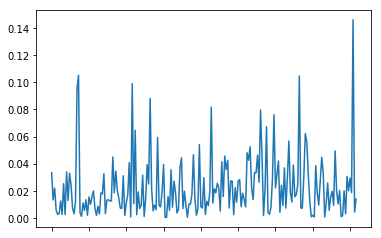

In [21]:
# For one option, make a graph with all the instances where the AskDifference > 0 (so undervalued option)
P80 = market_data.loc[market_data["P80", "AskDifference"] > 0]
P80["P80", "AskDifference"].plot()

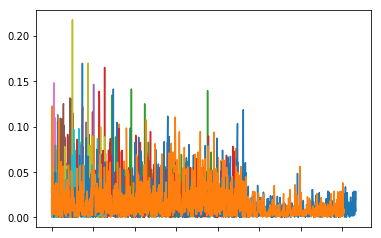

In [22]:
# Do the same for all options, graph with instances where the options are undervalued
for option in option_names:
    OptionAsk = market_data.loc[market_data[option, "AskDifference"] > 0]    
    OptionBid = market_data.loc[market_data[option, "BidDifference"] > 0]
    OptionAsk[option, "AskDifference"].plot()
    OptionBid[option, "BidDifference"].plot()

In [305]:
# Calculate the average of the AskDifference of all options, which we will use as our trading offset.
# So how much the ask price is lower than the theoreticl ask value, on average

meandifference = []
for option in option_names:
    OptionAsk = market_data.loc[market_data[option, "AskDifference"] > 0]    
    OptionBid = market_data.loc[market_data[option, "BidDifference"] > 0]
    meandifference.append(OptionAsk[option, "AskDifference"].mean())
    meandifference.append(OptionBid[option, "BidDifference"].mean())
    
trading_offset = sum(meandifference) / len(meandifference)
trading_offset

0.021137841124791678

In [24]:
option_deltas = []
for option in option_names:
    option_deltas.append([option,"Delta"])
    
option_deltas

[['P60', 'Delta'],
 ['P70', 'Delta'],
 ['P80', 'Delta'],
 ['C60', 'Delta'],
 ['C70', 'Delta'],
 ['C80', 'Delta']]

In [25]:
values = [1,2,5,1,2,5,2]
result = 0
for value in values:
    result += value
print(result)

18


In [26]:
## Create hedge_ratio function to determine ratio of options to underlying stock 

# Function to determine if number is whole
def is_whole(n):
    return n % 1 == 0

# List of numbers from 99 to 1 that 100 can be divided by to get a whole number: [50,25,20,10,5,4,2,1]
integer_numbers = []
for i in reversed(range(1,100)):
    if is_whole(100/i):
        integer_numbers.append(i)

# Check if the rounded delta can be divided by a number in the list integer_numbers so that it is a whole number
# for example: if delta is 0.701300, then the rounded delta is 70 and it can be divided by 10 -> hedge ratio = 10/7,
# since 100/10 is a whole number (10) and 70/10 is a whole number (7) -> trade 10 options and 7 underlying stocks
def hedge_ratio(delta, integer_numbers):
    for number in integer_numbers:
        if is_whole(round(abs(delta) * 100) / number):
            hedge_ratio.options_ratio = 100/number
            hedge_ratio.stocks_ratio = round(abs(delta) * 100) / number
            break

In [27]:
hedge_ratio(-0.444272, integer_numbers)
print(hedge_ratio.options_ratio)
print(hedge_ratio.stocks_ratio)

25.0
11.0


In [28]:
# Once we have the hedge_ratio, we want to know how many options and stocks we can trade

# For example, hedge_ratio is 4/3 (4 options, 3 stocks), option ask volume = 23 and stock bid bolume = 77
# -> buy 20 options, sell 15 stocks which is in the ratio 4/3 (and vice versa if we sell a call or buy a put, of course)
option_ratio = 4
stock_ratio = 3
option_volume = 23
stock_volume = 77

options_trade = option_volume-(option_volume%option_ratio)
stocks_trade = (options_trade/option_ratio)*stock_ratio

print(options_trade, stocks_trade)

# Put the above code into a function -> if the result = 0 (when the hedge_ratio is e.g. 100/91, we do not want to trade)
def trade_made(options_ratio, stocks_ratio, option_volume, stock_volume):
    trade_made.options_trade = option_volume-(option_volume%options_ratio)
    trade_made.stocks_trade = (trade_made.options_trade/options_ratio)*stocks_ratio

trade_made(25,11,117,147)
print(trade_made.options_trade, trade_made.stocks_trade)

20 15.0
100 44.0


In [29]:
def total_delta(market_data, option_names, positions):
    total_delta.total_delta=0
    for option in option_names:
        delta = market_data[option, "DeltaMid"] * positions[option]
        total_delta.total_delta += delta
    total_delta.total_delta += positions["Stock"]
    


In [207]:
y = 3
z = 4
x = 0

for i in range(0,4):
    x += i
x += -10

if x >= 4:
    y += -round(x)
    z = x - round(x)
elif x <= -4:
    y += -round(x)
    z = x -round(x)
    
print(x,y,z)   

-4 7 0


In [ ]:
#     if total_delta >= 19:
#         positions.loc[time, "Stock"] += -round(total_delta)
# #         positions.loc[time, 'TotalDelta'] = total_delta - 19
# #         positions.loc[time, 'TotalDelta'] = total_delta -round(total_delta)
#     elif total_delta <= -19:
#         positions.loc[time, 'Stock'] += round(total_delta)
# #         positions.loc[time, 'TotalDelta'] = total_delta + 19
# #         positions.loc[time, 'TotalDelta'] += -round(total_delta)

In [306]:
### Algorithm 

# Create positions dataframe with stock and options
positions = pd.DataFrame(data=0, 
                         index=market_data.index,
                         columns= option_names)
positions["Stock"] = 0
positions["TotalDelta"] = 0
positions = positions.sort_index(axis = 1, ascending = False)

# Max absolute delta is 20
delta_limit = 20   
# Loop over the timestamps
prev_time = None
for time, mkt_data_at_time in market_data.iterrows():
    if prev_time == None:
        # This skips the first observation, we don't want to take a position yet
        prev_time = time
        continue
    # Loop over the put and call options at each timestamp
    temporary_stock=0
    temporary_stock2=0
    
    for option in option_names:
        
        # Calculate gamma and change in delta
#         gamma = mkt_data_at_time[]

    # If the ask price of an option is lower than the theoretical price by more than our required offset,
    # we want to buy the option
        if mkt_data_at_time[option, "AskDifference"] > trading_offset:

         # First specify the trades for call options
            if option[0] == 'C':
                
            # Get option volume and stock volume. Buy the option so ask volume, and sell the stock so bid volume.
                option_volume = mkt_data_at_time[option, "AskVolume"]
                stock_volume = mkt_data_at_time["Stock", "BidVolume"]

                # Use delta to determine hedge ratio, how much of the option compared to underlying stock is needed
                hedge_ratio(mkt_data_at_time[option, "DeltaAsk"], integer_numbers)

                # Use the results from the hedge_ratio function to determine how much we are going to trade, by
                # taking into account the available option and stock volume
                trade_made(hedge_ratio.options_ratio, hedge_ratio.stocks_ratio, option_volume, stock_volume)

                # Buy the call so +, and sell the stock so -
                positions.loc[time, option] = positions.loc[prev_time, option] + trade_made.options_trade
#                 positions.loc[time, "Stock"] += -trade_made.stocks_trade
                temporary_stock+= -trade_made.stocks_trade
                
#                 print(-trade_made.stocks_trade)
#                 print(positions.loc[time, "Stock"])
#                 print(temporary_stock)
         
            # Now for put options
            elif option[0] == 'P':
                
            # Get option volume and stock volume. Buy the option so ask volume, and buy the stock so ask volume.
                option_volume = mkt_data_at_time[option,"AskVolume"]
                stock_volume = mkt_data_at_time["Stock", "AskVolume"]

                # Use delta to determine hedge ratio, how much of the option compared to underlying stock is needed
                hedge_ratio(mkt_data_at_time[option, "DeltaAsk"], integer_numbers)

                # Use the results from the hedge_ratio function to determine how much we are going to trade, by
                # taking into account the available option and stock volume
                trade_made(hedge_ratio.options_ratio, hedge_ratio.stocks_ratio, option_volume, stock_volume)

                # Buy the put so +, and sell the stock so +
                positions.loc[time, option] = positions.loc[prev_time, option] + trade_made.options_trade
#                 positions.loc[time, "Stock"] += trade_made.stocks_trade
                temporary_stock2+= trade_made.stocks_trade

#                 print(trade_made.stocks_trade)
#                 print(positions.loc[time, "Stock"])
#                 print(temporary_stock2)



# #                 Now we do the same, but this time we sell the options (so look at BidDifference)
        elif mkt_data_at_time[option, "BidDifference"] > trading_offset:
                
            if option[0] == 'C':
                
            # Get option volume and stock volume. Sell the option so bid volume, and buy the stock so ask volume.
                option_volume = mkt_data_at_time[option, "BidVolume"]
                stock_volume = mkt_data_at_time["Stock", "AskVolume"]

                # Use delta to determine hedge ratio, how much of the option compared to underlying stock is needed
                hedge_ratio(mkt_data_at_time[option, "DeltaBid"], integer_numbers)

                # Use the results from the hedge_ratio function to determine how much we are going to trade, by
                # taking into account the available option and stock volume
                trade_made(hedge_ratio.options_ratio, hedge_ratio.stocks_ratio, option_volume, stock_volume)

                # Sell the call so -, and buy the stock so +
                positions.loc[time, option] = positions.loc[prev_time, option] - trade_made.options_trade
#                 positions.loc[time, "Stock"] += trade_made.stocks_trade
                temporary_stock+= trade_made.stocks_trade
                
#                 print(trade_made.stocks_trade)
#                 print(positions.loc[time, "Stock"])
#                 print(temporary_stock)

        
        # Now for put options
            elif option[0] == 'P':
                
            # Get option volume and stock volume. Sell the option so bid volume, and sell the stock so bid volume.
                option_volume = mkt_data_at_time[option,"BidVolume"]
                stock_volume = mkt_data_at_time["Stock", "BidVolume"]

                # Use delta to determine hedge ratio, how much of the option compared to underlying stock is needed
                hedge_ratio(mkt_data_at_time[option, "DeltaBid"], integer_numbers)

                # Use the results from the hedge_ratio function to determine how much we are going to trade, by
                # taking into account the available option and stock volume
                trade_made(hedge_ratio.options_ratio, hedge_ratio.stocks_ratio, option_volume, stock_volume)

                # Buy the put so +, and Buy the stock so +
                positions.loc[time, option] = positions.loc[prev_time, option] - trade_made.options_trade
#                 positions.loc[time, "Stock"] += -trade_made.stocks_trade
                temporary_stock2+= -trade_made.stocks_trade
                
#                 print(-trade_made.stocks_trade)
#                 print(positions.loc[time, "Stock"])
#                 print(temporary_stock2)


        else:
            positions.loc[time, option] = positions.loc[prev_time, option]
#             positions.loc[time, "Stock"] = positions.loc[prev_time, "Stock"]
            
#     if positions.loc[time, "Stock"] != positions.loc[prev_time, "Stock"]:
#         positions.loc[time, "Stock"] += positions.loc[prev_time, "Stock"]
    positions.loc[time, "Stock"] = positions.loc[prev_time, "Stock"] + temporary_stock2 + temporary_stock
    
    total_delta=0
    for option in option_names:
#         delta = mkt_data_at_time[option, "DeltaMid"] * positions.loc[time,option]
        total_delta += mkt_data_at_time[option, "DeltaMid"] * positions.loc[time,option]
    total_delta += positions.loc[time, "Stock"]
#     positions.loc[time, "TotalDelta"] = total_delta        

    if total_delta >= delta_limit:
        positions.loc[time, "Stock"] += -round(total_delta)
#         positions.loc[time, 'TotalDelta'] = total_delta - 19
        positions.loc[time, 'TotalDelta'] = total_delta -round(total_delta)
    elif total_delta <= -delta_limit:
        positions.loc[time, 'Stock'] += -round(total_delta)
#         positions.loc[time, 'TotalDelta'] = total_delta + 19
        positions.loc[time, 'TotalDelta'] = total_delta -round(total_delta)
    else:
        positions.loc[time, "TotalDelta"] = total_delta        
        
        # In the next iteration of the loop, the previous time will be what is now the current time
    prev_time = time

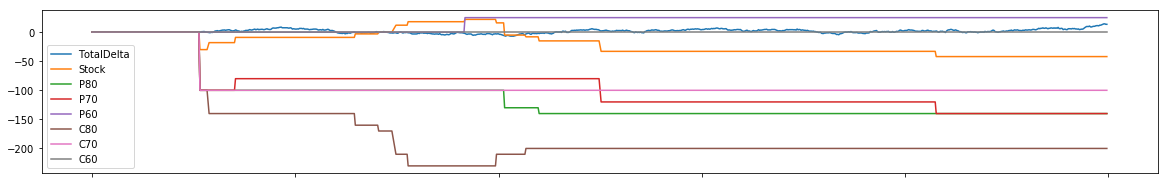

In [307]:
# Visualize positions over time
positions.iloc[0:1000].plot(figsize=(20, 3))


In [308]:
positions.tail()

,TotalDelta,Stock,P80,P70,P60,C80,C70,C60
2018-02-28 23:35:00,-13.743890,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0
2018-02-28 23:40:00,-13.306104,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0
2018-02-28 23:45:00,-13.306478,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0
2018-02-28 23:50:00,-13.306851,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0
2018-02-28 23:55:00,-11.989719,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0


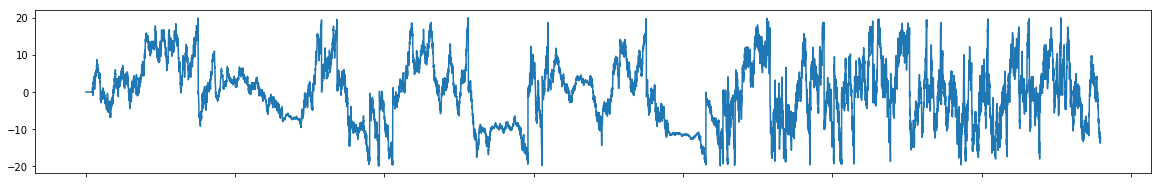

In [309]:
positions['TotalDelta'].plot(figsize=(20, 3))


In [310]:
positions.loc[abs(positions['TotalDelta']) > 20]

,TotalDelta,Stock,P80,P70,P60,C80,C70,C60


In [311]:
positions.loc["2018-01-08 06:15:00":"2018-01-08 06:30:00"]

,TotalDelta,Stock,P80,P70,P60,C80,C70,C60
2018-01-08 06:15:00,4.038634,-84.0,-140.0,-160.0,25.0,-148.0,-100.0,0.0
2018-01-08 06:20:00,5.480752,-84.0,-140.0,-160.0,25.0,-148.0,-100.0,0.0
2018-01-08 06:25:00,4.760688,-84.0,-140.0,-160.0,25.0,-148.0,-100.0,0.0
2018-01-08 06:30:00,4.040211,-84.0,-140.0,-160.0,25.0,-148.0,-100.0,0.0


In [312]:
market_data.loc["2018-01-08 06:15:00":"2018-01-08 06:30:00"]

TimeToExpiry    Stock                               \
                                 MidPrice BidVolume BidPrice AskVolume   
2018-01-08 06:15:00     0.891743    69.30     129.0    69.20     115.0   
2018-01-08 06:20:00     0.891733    69.20     135.0    69.10     116.0   
2018-01-08 06:25:00     0.891724    69.25     130.0    69.15     110.0   
2018-01-08 06:30:00     0.891714    69.30     129.0    69.20     101.0   

                                    P80                                 \
                    AskPrice   ValueBid   ValueAsk  DeltaMid  DeltaBid   
2018-01-08 06:15:00    69.40  12.582288  12.432842 -0.747232 -0.749670   
2018-01-08 06:20:00    69.30  12.657355  12.507421 -0.749671 -0.752100   
2018-01-08 06:25:00    69.35  12.619758  12.470067 -0.748455 -0.750888   
2018-01-08 06:30:00    69.40  12.582222  12.432775 -0.747237 -0.749674   

                         ...             C60                                \
                         ...        ValueAsk  DeltaMid  DeltaBid  DeltaAsk   
2018-01-08 06:15:00      ...       10.777510  0.804392  0.806495  0.802273   
2018-01-08 06:20:00      ...       10.697370  0.802274  0.804393  0.800139   
2018-01-08 06:25:00      ...       10.737384  0.803337  0.805448  0.801210   
2018-01-08 06:30:00      ...       10.777452  0.804395  0.806497  0.802276   

                                                                         \
                    BidVolume BidPrice BidDifference AskVolume AskPrice   
2018-01-08 06:15:00      20.0    10.76     -0.178388      16.0    10.86   
2018-01-08 06:20:00      20.0    10.73     -0.127824      16.0    10.83   
2018-01-08 06:25:00      19.0    10.84     -0.058051      15.0    10.94   
2018-01-08 06:30:00      20.0    10.83     -0.108331      15.0    10.92   

                                   
                    AskDifference  
2018-01-08 06:15:00     -0.082490  
2018-01-08 06:20:00     -0.132630  
2018-01-08 06:25:00     -0.202616  
2018-01-08 06:30:00     -0.142548  

[4 rows x 72 columns]

In [313]:
# Traded lots, assume we trade 0 in the first period
trades = positions.diff().fillna(0)

# Again start with an empty DataFrame
pnl_trades = pd.DataFrame(index = trades.index, columns = list(positions))


# Calculate total PnL made from trading (we bought against ask price, and sold against bid price).
lots_bought = np.maximum(trades, 0)
lots_sold = -np.minimum(trades, 0)

for position in list(positions):
    if position[0] != 'T':
        pnl_trades[position] = lots_sold[position] * market_data[position, 'BidPrice'] - lots_bought[position] * market_data[position, 'AskPrice']

pnl_trades_total = pnl_trades.iloc[:,:].sum(axis=1)
pnl_trades_cumulative = pnl_trades_total.cumsum()

In [314]:
# Evaluating the position at current midprice per stock
position_valuation = pd.DataFrame(data = 0, index = trades.index, columns = list(positions))

for position in list(positions):
    if position[0] != 'T':
        position_valuation[position] = (market_data[position, 'AskPrice'] + market_data[position, 'BidPrice'])/2 * positions[position]

position_valuation_total = position_valuation.iloc[:,:].sum(axis=1)

position_valuation_total.tail()

2018-02-28 23:35:00   -43758.160
2018-02-28 23:40:00   -43688.590
2018-02-28 23:45:00   -43678.235
2018-02-28 23:50:00   -43635.680
2018-02-28 23:55:00   -43636.600
dtype: float64

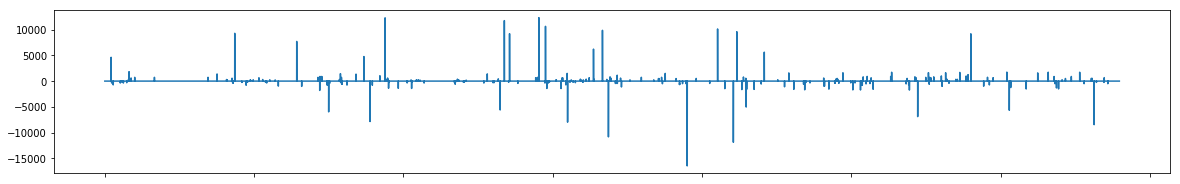

In [315]:
# Total pnl from trades and position
pnl_total = pnl_trades_cumulative + position_valuation_total

# Plot it
pnl_trades_total.plot(figsize=(20, 3))

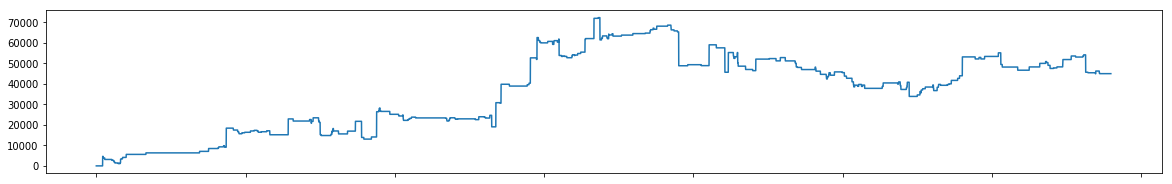

In [316]:
# Visualize cumulative profit and loss
pnl_trades_cumulative.plot(figsize=(20, 3))

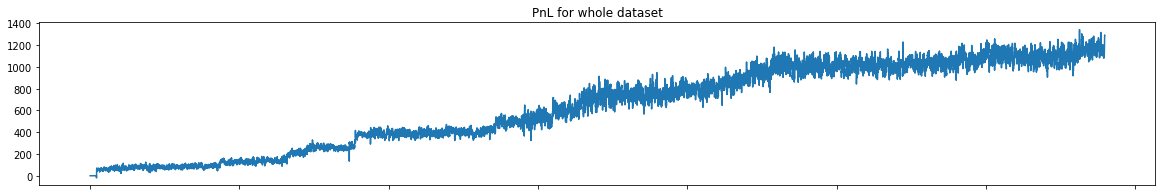

In [317]:
# Visualize total pnl

pnl_total.plot(figsize=(20, 3), title='PnL for whole dataset')

In [318]:
# Create output dataframe with positions and the PnL
output = pd.concat((positions, pnl_total), axis=1)
output.columns.values[[-1]] = ['Profit-and-Loss']
output.tail()

,TotalDelta,Stock,P80,P70,P60,C80,C70,C60,Profit-and-Loss
2018-02-28 23:35:00,-13.743890,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0,1170.660
2018-02-28 23:40:00,-13.306104,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0,1240.230
2018-02-28 23:45:00,-13.306478,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0,1250.585
2018-02-28 23:50:00,-13.306851,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0,1293.140
2018-02-28 23:55:00,-11.989719,-577.0,-112.0,-752.0,-305.0,-129.0,501.0,-50.0,1292.220


In [319]:
# Create CSV output file 
output.to_csv("PnL.csv")